## About

This plot is a [mirror barplot](https://python-graph-gallery.com/barplot/). It shows the **number of outgoing and incoming students**  in different countries. Each bar is the **average of the country**, and the points the values for each year. 

The chart was originally made with [R](https://r-graph-gallery.com). This post is a translation to Python by [Joseph B.](https://www.barbierjoseph.com/). 

Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![scatterplot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-ordered-mirror-barplot.png?raw=true)

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- `pandas` is used to put the data into a dataframe and data manipulation
- `numpy` is used for adding noise to the positions of each marker

And that's it!

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

In [4]:
# URLs
resume_url = 'https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/resume.csv'
erasmus_url = 'https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/erasmus.csv'

# load datasets
resume = pd.read_csv(resume_url)
data = pd.read_csv(erasmus_url)

## Ordered barplot

First, let's create the barplots without so much customization. 

In order to have the **barplots side by side**, we just have to specify than the **second one will be in negative** (`-resume['mean_send']` when using the `barh()` function). Moreover, since we ordered before our dataset by the `mean_send` column, it will automatically be in the right order (**decreasing**).

The `alpha` argument defines the **opacity of the bars** (between 0 and 1).

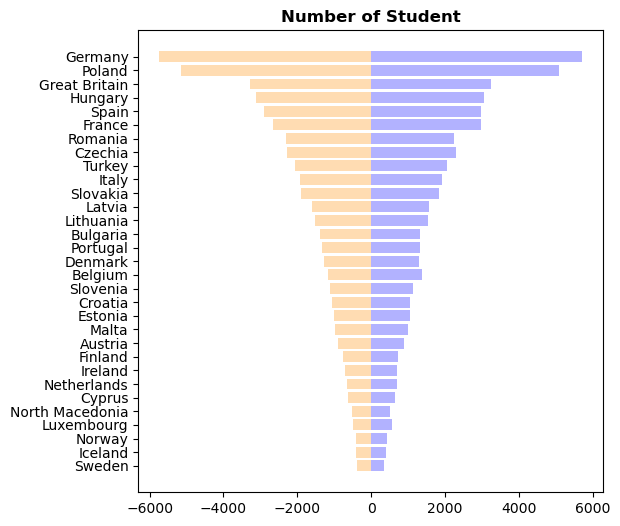

In [5]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

# Create both barplots
ax.barh(resume['country_name'], resume['mean_rec'],
        color='blue', alpha=0.3)
ax.barh(resume['country_name'], -resume['mean_send'],
        color='darkorange', alpha=0.3)

# Add a title
ax.set_title('Number of Student', weight='bold')

# Display the plot
plt.show()

## Remove spines and shift country names

In this step, we will remove the spines (border of the graph) and put the country names on each bar

- **remove label** using `ax.set_xticks([])`
- **remove spines** using `ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)`
- add **labels on the center** using the `text()` function

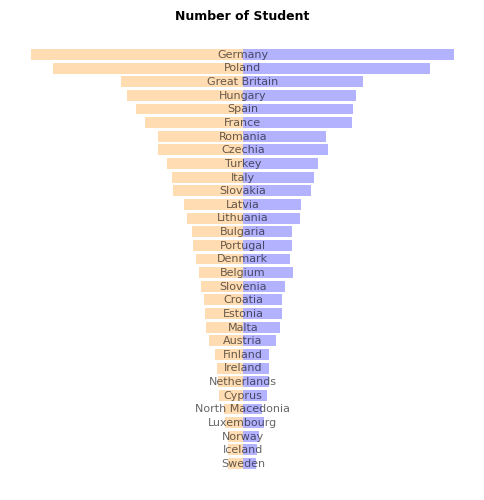

In [6]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

# Create both barplots
ax.barh(resume['country_name'], resume['mean_rec'],
        color='blue', alpha=0.3)
ax.barh(resume['country_name'], -resume['mean_send'],
        color='darkorange', alpha=0.3)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Put country names on the center of the chart
for i, country_name in enumerate(resume['country_name']):
    ax.text(0, i, country_name, ha='center', va='center', fontsize=8, alpha=0.6)

# Add a title
ax.set_title('Number of Student', weight='bold', fontsize=9)

# Display the plot
plt.show()

## Add individual points

The peculiarity of the points in this graph is linked to 2 things:
- their position on the y-axis, which is **different for each country**
- their opacity, which **depends on the year concerned**

In practice, we iterate over the rows of our `data` dataframe (thanks to `iterrows()`) that we **haven't used until now**, retrieving positions and opacity **according to country name and year**.

For visual purpose, we add a very small noise to the `y_position` so that the points are **slightly burst**.

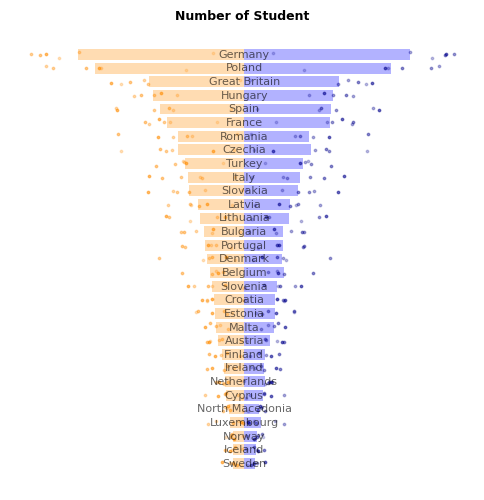

In [7]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

# Create both barplots
ax.barh(resume['country_name'], resume['mean_rec'],
        color='blue', alpha=0.3)
ax.barh(resume['country_name'], -resume['mean_send'],
        color='darkorange', alpha=0.3)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Put country names on the center of the chart
for i, country_name in enumerate(resume['country_name']):
    ax.text(0, i, country_name, ha='center', va='center', fontsize=8, alpha=0.6)

# Add each observations, for each year and country
y_position = 0
for i, row in data.iterrows():
    
    # Get values
    sending = -row['participants_x']
    receiving = row['participants_y']
    y_position = row['y_position']
    years = row['academic_year']
    
    # Change alpha parameter according to the year concerned
    year_alpha_mapping = {'2014-2015': 0.3,
                          '2015-2016': 0.4,
                          '2016-2017': 0.5,
                          '2017-2018': 0.6,
                          '2018-2019': 0.7,
                          '2019-2020': 0.9}
    alpha = year_alpha_mapping[years]*0.6 # adjust as needed
    
    # Add small noise to the y_position
    y_position += np.random.normal(0, 0.1, 1)
    
    # Add 
    ax.scatter(sending, y_position, c='darkorange', alpha=alpha, s=3)
    ax.scatter(receiving, y_position, c='darkblue', alpha=alpha, s=3)


# Add a title
ax.set_title('Number of Student', weight='bold', fontsize=9)

# Display the plot
plt.show()

## Add annotations for final chart

All that's missing is a few annotations, but the **hard part's over**! 

Thanks to the `text()` function, you can easily add **annotations of different sizes and styles**.

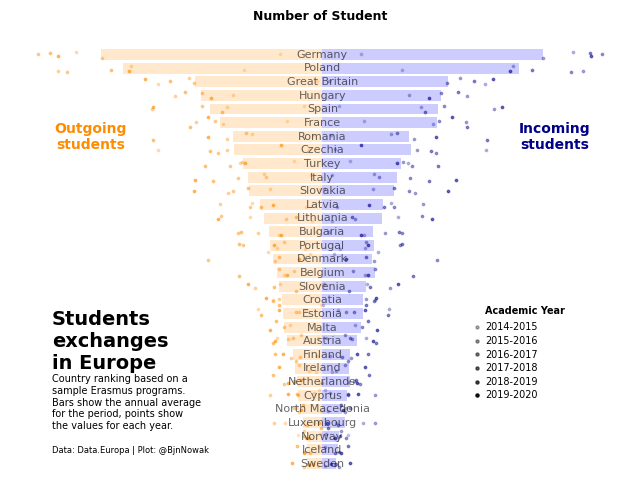

In [8]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(8, 6))

# Create both barplots
ax.barh(resume['country_name'], resume['mean_rec'],
        color='blue', alpha=0.2)
ax.barh(resume['country_name'], -resume['mean_send'],
        color='darkorange', alpha=0.2)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Put country names on the center of the chart
for i, country_name in enumerate(resume['country_name']):
    ax.text(0, i, country_name, ha='center', va='center', fontsize=8, alpha=0.6)

# Add each observations, for each year and country
y_position = 0
for i, row in data.iterrows():
    
    # Get values
    sending = -row['participants_x']
    receiving = row['participants_y']
    y_position = row['y_position']
    years = row['academic_year']
    
    # Change alpha parameter according to the year concerned
    year_alpha_mapping = {'2014-2015': 0.3,
                          '2015-2016': 0.4,
                          '2016-2017': 0.5,
                          '2017-2018': 0.6,
                          '2018-2019': 0.7,
                          '2019-2020': 0.9}
    alpha = year_alpha_mapping[years]*0.6
    
    # Add small noise to the y_position
    y_position += np.random.normal(0, 0.2, 1)
    
    # Add 
    ax.scatter(sending, y_position, c='darkorange', alpha=alpha, s=3)
    ax.scatter(receiving, y_position, c='darkblue', alpha=alpha, s=3)


# Label of Outgoing and Incoming students
ax.text(-6000, 24, 'Outgoing\nstudents',
        color='darkorange', ha='center', va='center', weight='bold')
ax.text(6000, 24, 'Incoming\nstudents',
        color='darkblue', ha='center', va='center', weight='bold')

# big title
ax.text(-7000, 9, 'Students\nexchanges\nin Europe',
        ha='left', va='center', weight='bold', fontsize=14)

# description 
text = '''Country ranking based on a
sample Erasmus programs.
Bars show the annual average
for the period, points show
the values for each year.'''
ax.text(-7000, 4.5, text, ha='left', va='center', fontsize=7)
    
# credits
text = '''Data: Data.Europa | Plot: @BjnNowak'''
ax.text(-7000, 1, text, ha='left', va='center', fontsize=6)

# Academic year legend
ax.text(x=4200, y=11, s='Academic Year', fontsize=7, weight='bold')
y_position = 10 # start at the 10th bar
for year, alpha in year_alpha_mapping.items():
    
    # Add the point
    ax.scatter(4000, y_position, alpha=alpha, s=5, c='black')
    ax.text(x=4200, y=y_position-0.2, s=year, fontsize=7)
    
    y_position -= 1 # decrease of one bar for the next iteration
    
# Add a title at the top
ax.set_title('Number of Student', weight='bold', fontsize=9)

# Display the plot
plt.show()

## Going further

This article explains how to reproduce a [mirror barplot](https://python-graph-gallery.com/bubble-plot/) with annotations, individual observations, custom style and nice features. 

For more examples of **advanced customization** in barplot, check out this [circular barplot](https://python-graph-gallery.com/web-circular-barplot-with-matplotlib/). Also, you might be interested in [creating advanced annotations](https://python-graph-gallery.com/advanced-custom-annotations-matplotlib/).